# Network Architecture Exploration: Understanding Underfitting and Overfitting
## Background
This exercise aims to demonstrate how different neural network architectures can lead to underfitting or overfitting. You will experiment with various configurations of a fully connected neural network to observe these phenomena.

## Underfitting
Occurs when a model is too simple to capture the underlying pattern of the data. Often caused by having too few layers or neurons.

## Overfitting
Happens when a model learns the training data too well, including the noise, making it perform poorly on new, unseen data. This can result from having too many layers or neurons.

## Setup
Import the necessary libraries and prepare the dataset.

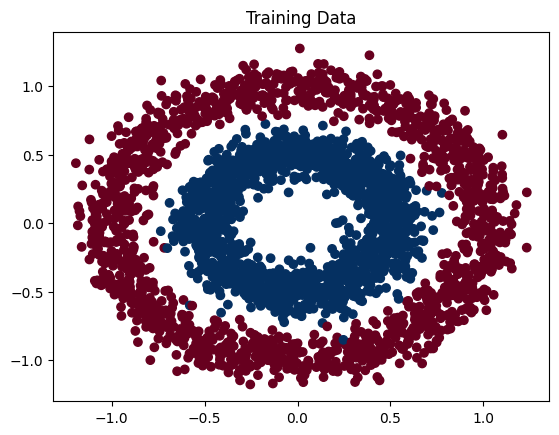

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=6000, noise=0.09, factor=0.5, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()

In [11]:
X.shape, y.shape

((6000, 2), (6000,))

In [12]:
y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

# Model Building
Define a function to create a model with a variable number of layers and neurons.

In [2]:
# Define the function with optional parameters for the number of layers, number of neurons per layer, 
# and the activation function to use in the hidden layers.
def build_model(num_layers=1, num_neurons=10, activation_function='sigmoid'):
    # Initialize a sequential model which is a linear stack of layers in Keras.
    model = tf.keras.models.Sequential()
    
    # Add the first dense (fully connected) layer which also acts as the input layer with the specified number 
    # of neurons and activation function. The input_shape parameter indicates the shape of the input data.
    model.add(tf.keras.layers.Dense(num_neurons, activation=activation_function, input_shape=(2,)))
    
    # Loop to add additional hidden layers. The range is set to one less than the num_layers since we already added the first layer.
    for _ in range(num_layers - 1):
        # Add a dense layer with the specified number of neurons and activation function during each iteration.
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation_function))
        
    # Add the output layer with a single neuron for binary classification using the sigmoid activation function.
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile the model with the 'adam' optimizer, 'binary_crossentropy' loss function, and track 'accuracy' as a metric.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Return the compiled model ready for training.
    return model

# Train and Evaluate Model Script
Below is a skeleton for a function to train and evaluate your models. Fill in the missing parts as indicated by the comments.

Training loss: 0.0183
Training accuracy: 0.9967
Test loss: 0.0149
Test accuracy: 0.9960
94/94 [==============================] - 0s 1ms/step


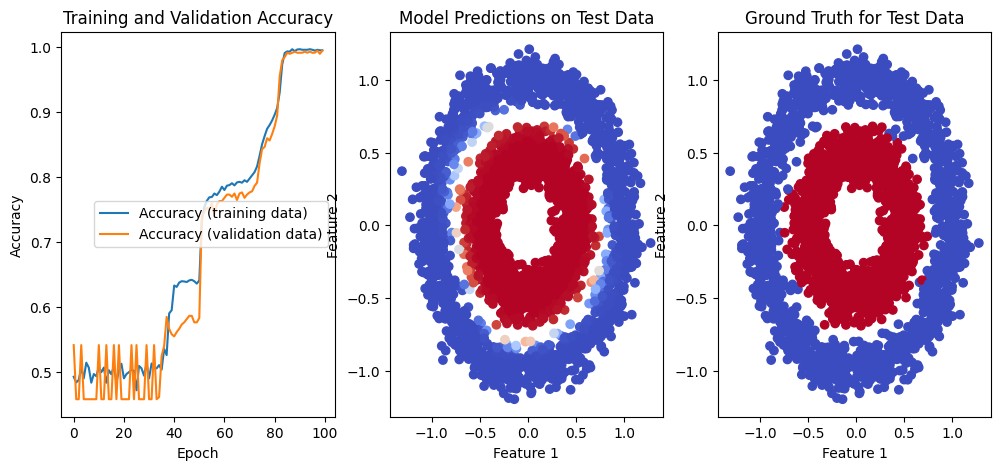

In [23]:
import matplotlib.pyplot as plt

# Define a function to train and evaluate the neural network model.
# The function accepts a model object, number of epochs to train, and a flag to plot the results.
def train_and_evaluate_model(model, epochs=50, plot=True):
    # Train the model on the training data with a portion of it reserved for validation.
    # The 'verbose=0' argument hides the training progress bar.
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    
    # Evaluate the trained model on the test dataset and store the loss and accuracy in variables.
    # The 'verbose=0' argument hides the evaluation progress bar.
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
    
    print(f'Training loss: {training_loss:.4f}')
    print(f'Training accuracy: {training_accuracy:.4f}')

    # Print out the loss and accuracy on the test set.
    print(f'Test loss: {test_loss:.4f}')
    print(f'Test accuracy: {test_accuracy:.4f}')

    
    # If plotting is enabled, generate the plots.
    if plot:
        # Set up a figure for plotting with a predefined size.
        plt.figure(figsize=(12, 5))

        # First subplot for training and validation accuracy.
        plt.subplot(1, 3, 1)
        # Plot the accuracy on training data.
        plt.plot(history.history['accuracy'], label='Accuracy (training data)')
        # Plot the accuracy on validation data.
        plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
        # Set the title and labels, and display the legend.
        plt.title('Training and Validation Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

        # Second subplot for model predictions.
        predictions = model.predict(X_test)  # Obtain predictions from the model using the test data.
        plt.subplot(1, 3, 2)
        # Scatter plot of predictions with a color map to distinguish prediction values.
        plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
        plt.title('Model Predictions on Test Data')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Third subplot for ground truth on the test set.
        plt.subplot(1, 3, 3)
        # Scatter plot of the ground truth labels with a color map to distinguish the classes.
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
        plt.title('Ground Truth for Test Data')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Display the plots.
        plt.show()


# The example usage of the function, building a model and then training and evaluating it.
model = build_model(num_layers=5, num_neurons=20)
train_and_evaluate_model(model, epochs=100)

# Experimentation
## Task 1: Underfitting
1. Create and train a model with very few layers and/or neurons (e.g., 1 layer with 5 neurons).
2. Evaluate Performance:
    * Plot training and validation accuracy over epochs.
    * Plot model predictions vs. ground truth on the test data.
    * Analyze if the model's performance is poor on both training and test data, which indicates underfitting.
1. 50 epoker:
- Training loss: 0.6572174429893494
- Training accuracy: 0.7276666760444641
- Test loss: 0.6576806902885437
- Test accuracy: 0.7459999918937683
* Både training och test har hög loss och låg accuracy vilket indikerar på underfitting
1. 100 epoker:
- Training loss: 0.5967069268226624
- Training accuracy: 0.7636666893959045
- Test loss: 0.5976119637489319
- Test accuracy: 0.7756666541099548
* förbättrar det lite, men när vi hade default layers och noder så konvergerade modellen vid 80 epoker
## Task 2: Overfitting
1. Create a model with an excessive number of layers and/or neurons (e.g., 5 layers with 100 neurons each) and increased number of epochs.
2. Evaluate Performance:
    * Observe the training and validation accuracy plots for a wide gap, indicating overfitting.
    * Compare model predictions with ground truth for the test data.
    * Look for high training accuracy but poor test accuracy.

1. 100 epoker:
- Training loss: 0.0183
- Training accuracy: 0.9967
- Test loss: 0.0149
- Test accuracy: 0.9960
## Task 3: Balanced Model
1. Experiment to find a balanced architecture.
2. Evaluate Performance:
    * Ensure the training and validation accuracy are both high and close to each other.
    * The model's predictions should closely match the ground truth for the test data.
    * The model should not show signs of significant underfitting or overfitting.

# Evaluation and Analysis
Use similar evaluation and visualization code as in the previous exercise to assess model performance.
Answer questions like:
1. What signs of underfitting did you observe?
2. What were the indications of overfitting?
3. Describe the architecture of the balanced model and its performance.

# Conclusion
Reflect on the importance of matching model complexity with the problem complexity and discuss the trade-offs involved in designing neural network architectures.

------------------

# Regularization Technique: Early Stopping
## Objective
Understand how early stopping can be used as a regularization technique to prevent overfitting and improve the generalization of neural networks.

## Background
Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. It involves stopping the training process if the model's performance on a validation set starts to deteriorate, meaning the model begins to learn noise and details from the training data that negatively impact its performance on unseen data.

## How Early Stopping Works
* Monitor the model's performance on a validation set during training.
* If the performance on the validation set stops improving or starts to worsen, stop the training.
* Often, a 'patience' parameter is set to allow some leeway, meaning training will stop only after the model's performance hasn't improved for a specified number of epochs.


# Implementation in TensorFlow
TensorFlow provides an easy way to implement early stopping through callbacks. Here’s how you can add early stopping to your training process:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback instance
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Include this callback in the model's fit method
model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])


## Task
1. Add early stopping to your neural network training process using the above code snippet.
2. Experiment with different values for the patience parameter and observe how it impacts the training process and the model's performance.

## Analysis and Questions
* How does early stopping affect the number of epochs for which your model trains?
* Did you observe any improvements in the generalization of your model to the test data?
* How does the patience parameter impact the effectiveness of early stopping?

## Conclusion
Reflect on the importance of regularization techniques like early stopping in preventing overfitting and improving model generalization.